# **Clusterización con K-means **

K-medias es un método de agrupamiento, que tiene como objetivo la partición de un conjunto de n observaciones en k grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano.
Es un algoritmo de aprendizaje no supervisado a diferecnia de los que vimos anteriormente. Es deceir que podemos tener datos sin una etiqueta con la respuesta correcta. Simplemente tenemos datos y debemos encontrar patrones.

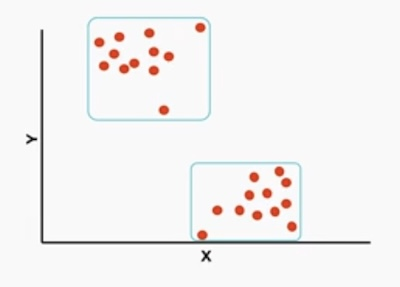

El algoritmo K-means necesita conocer cuantos grupos o cluster vamos a segmentar. A pertir de alli comienza colocando esa cantidad de puntos en forma aleatorea. Revisa los puntos que tenga cercanos calculando la distancia y se mueve un poco para intentear medir esa distancia.

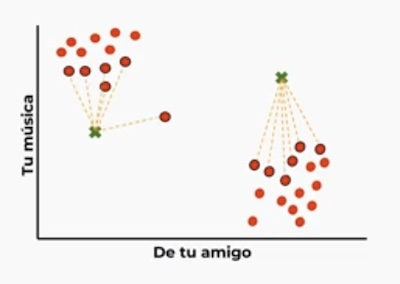

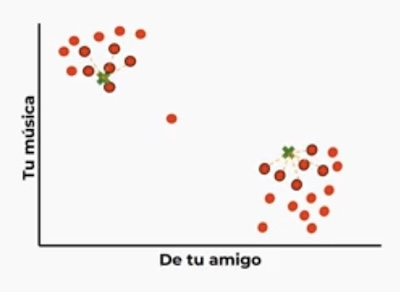

Sigue realizando este proceso por un numero limitado de iteraciones siempre intentando minimizar la distacia de los puntos a su grupo.

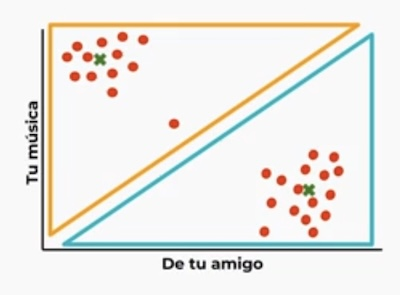

Algunos de los hiperparametros que se pueden ajustar son:

-El numero de Cluster que queremos.

-La cantidad de iteraciones.

-Cantidad de veces que correra el proceso con puntos de inicio aleatorios distintos.

Esto ultimo es para prevenir inicios que sean complejos para determinar clusters.

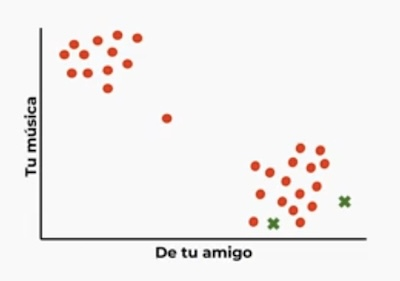

Al ser un proceso que depende de una posicion de inicio aleatorea, los resultados no siempre son los mismos, si bien en el promedio son similares.


In [56]:
import pandas as pd
datos = pd.read_csv("housing.csv")

In [57]:
#Vemos las columnas o caracteristicas de los datos. Con esto podemos decidir cual sera
#la caracteristica en la que queremos agrupar los datos.
#Ej: podemos tener en cuenta la Lat y Long para despues agrupar por ingresos o costos de la casa

datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

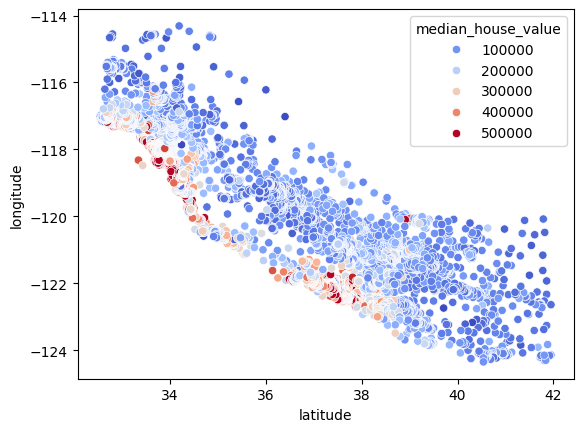

In [58]:
import seaborn as sb
#Mapa basado en el valor de propiedades

sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_house_value",
               palette="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

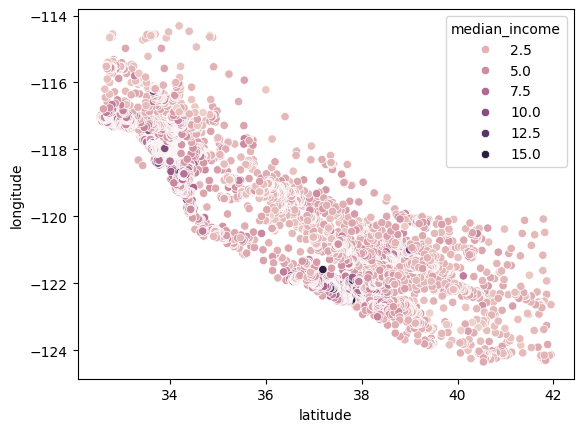

In [59]:
import seaborn as sb
#Mapa basado en los ingresos medios

sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_income", sizes = datos["median_income"],)

In [60]:
#Para poder realizar una segmentacion agrupadas por zonas en base a los ingresos
#vamos a trabajar con 3 datos. Eso lo podemos hacer con .loc de pandas
#[:,]Empieza desde el dato 0 con lo cual se puede omitir, solo ":" Es decir que
#se toma en cuenta todas las filas y a continuacion una listas con las columnas.
#Esto nos devuelve un dataset nuevo con estos datos.

datos.loc[:, ["latitude", "longitude", "median_income"]]

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [61]:
from sklearn.cluster import KMeans
#Vamos a entrenar el modelo. Importamos kmeans de sklearn
#Solamente le especificamos X ya que no hay Y con etiquetas
#en este tipo de modelos.

X = datos.loc[:, ["latitude", "longitude", "median_income"]]

#max_iter:  Cantidad de veces que va ajustar los puntos a los mas cercanos de
#           cada grupo
#c_cluster: Cantidad de cluster o grupos que va formar el modelo.
#n_init:    Cantidad de vueltas que realizara a todo el proceso. Reinicios.
#           Reinicia los puntos aleatorios.

modelo = KMeans(n_clusters=3)  #Podemos ver otros Hiperparametros.

predicciones = modelo.fit_predict(X)

In [62]:
predicciones

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [63]:
predicciones.shape

(20640,)

In [64]:
#Agrego la columna segmento_economico con las predicciones del modelo.
#Es decir el numero correspondiente a cada grupo.

X["segmento_economico"] = predicciones

In [65]:
X

,latitude,longitude,median_income,segmento_economico
0,37.88,-122.23,8.3252,1
1,37.86,-122.22,8.3014,1
2,37.85,-122.24,7.2574,1
3,37.85,-122.25,5.6431,1
4,37.85,-122.25,3.8462,1
...,...,...,...,...
20635,39.48,-121.09,1.5603,1
20636,39.49,-121.21,2.5568,1
20637,39.43,-121.22,1.7000,1
20638,39.43,-121.32,1.8672,1


In [66]:
#Cuento la cantidad que hay en cada segmento_economico
#Probablemente en el grupo 2 sean las personas de mayores ingresos ya que
#es el grupo mas chico.

X["segmento_economico"].value_counts()

,count
segmento_economico,
2,9384
1,8457
0,2799


<Axes: xlabel='latitude', ylabel='longitude'>

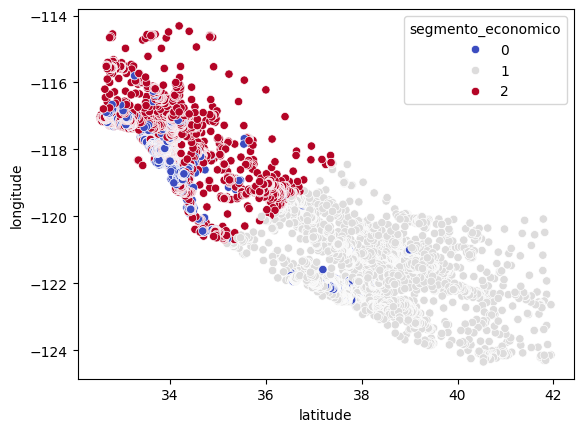

In [67]:
import seaborn as sb
#Graficamos pero teniendo en cuenta que datos ahora es X
#y basado en segmento_economico que son los grupos que creo el modelo.

sb.scatterplot(x="latitude", y="longitude", data=X, hue="segmento_economico",
               palette="coolwarm")

In [68]:
from sklearn.cluster import KMeans
#Vamos a entrenar el modelo nuevamente pero vamos formar mas grupos.
#En este caso 6

X = datos.loc[:, ["latitude", "longitude", "median_income"]]
modelo = KMeans(n_clusters=6)  #Podemos ver otros Hiperparametros.
predicciones = modelo.fit_predict(X)

In [69]:
#Volvemos a cargar predicciones en X

X["segmento_economico"] = predicciones

In [70]:
X

,latitude,longitude,median_income,segmento_economico
0,37.88,-122.23,8.3252,3
1,37.86,-122.22,8.3014,3
2,37.85,-122.24,7.2574,3
3,37.85,-122.25,5.6431,3
4,37.85,-122.25,3.8462,0
...,...,...,...,...
20635,39.48,-121.09,1.5603,0
20636,39.49,-121.21,2.5568,0
20637,39.43,-121.22,1.7000,0
20638,39.43,-121.32,1.8672,0


In [71]:
#Cuento la cantidad que hay en cada segmento_economico
#Probablemente en el grupo 5 sean las personas de mayores ingresos ya que
#es el grupo mas chico.

X["segmento_economico"].value_counts()

,count
segmento_economico,
1,6620
0,4875
2,4162
3,2771
4,1677
5,535


<Axes: xlabel='latitude', ylabel='longitude'>

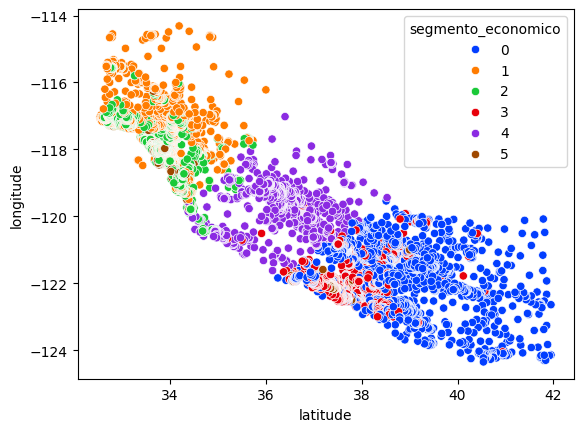

In [72]:
import seaborn as sb
#Volvemos a graficar

sb.scatterplot(x="latitude", y="longitude", data=X, hue="segmento_economico",
               palette="bright")

<Axes: xlabel='segmento_economico', ylabel='count'>

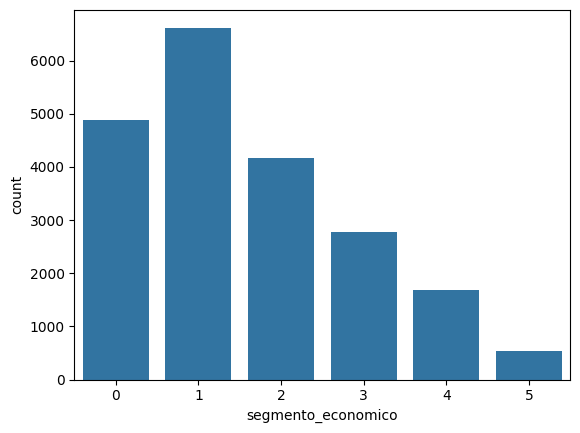

In [73]:
#Graficamos un conteo de cada categoria.
#No tiene en cuenta el valor del ingresos sino solamente
#la cantidad que tiene cada segmente.

sb.countplot(x="segmento_economico", data=X)

In [74]:
#Agrupamos en segmento economico. Y por cada uno (6 veces) es decir el promedio
#de ingresos de cada grupo. Esto es promedio en de miles de dolares. x1.000
#Saca el proemedio de ingresos de cada grupo.

X.groupby(["segmento_economico"])["median_income"].mean()

,median_income
segmento_economico,
0,2.822327
1,2.799299
2,5.332638
3,5.518715
4,2.660862
5,10.563325
